# Simple CPW Meander

We'll be creating a 2D design and adding a meandered resonator QComponent.  
Will use component called OpenToGround for termination of resonators.

Simple RouteMeander resonator object will be shown. 

RouteMeander: Implements a simple CPW, with a single meander.  
OpenToGround: A basic open to ground termination. Functions as a pin for auto drawing.

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

In [3]:
# Each time you create a new quantum circuit design, 
# you start by instantiating a QDesign class. 

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [5]:
# Be aware of the default_options that can be overridden by user.
RouteMeander.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False}

In [6]:
# Be aware of the default_options that can be overridden by user.
OpenToGround.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'width': '10um',
 'gap': '6um',
 'termination_gap': '6um'}

In [7]:
# To force overwrite a QComponent with an existing name.  
# This is useful when re-running cells in a notebook. 
design.overwrite_enabled = True

A RouteMeander connector are shown.  The terminations are open-to-ground. 

The pin_inputs is the default dictionary for passing pins into a component, **BUT** how the dictionary is structured is component dependent. Using the below structure (eg. start_pin, end_pin) is suggested for any 2 port type connection, but you should always check the documentation for the specific component you are wanting to use.

In [8]:
open_start_options = Dict(pos_x='1000um',
                         pos_y='0um',
                         orientation = '-90')

open_start_meander = OpenToGround(design,'Open_meander_start',options=open_start_options)





open_end_options = Dict(pos_x='1000um',
                        pos_y='1500um',
                        orientation='90',
                        termination_gap='10um')

open_end_meander = OpenToGround(design,'Open_meander_end',options=open_end_options)

In [9]:
meander_options = Dict(pin_inputs=Dict(start_pin=Dict(
                                            component='Open_meander_start',
                                            pin='open'),
                                        end_pin=Dict(
                                            component='Open_meander_end',
                                            pin='open')
                                        ),
                      total_length='9mm',
                      fillet='99.99um')

testMeander = RouteMeander(design,'meanderTest',options=meander_options)
gui.rebuild()
gui.autoscale()
gui.zoom_on_components([testMeander.name, open_start_meander.name, open_end_meander.name]) 

02:20PM 21s WARNING [check_lengths]: For path table, component=meanderTest, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
02:20PM 21s WARNING [check_lengths]: For path table, component=meanderTest, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
02:20PM 21s WARNING [check_lengths]: For path table, component=meanderTest, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
02:20PM 21s WARNING [check_lengths]: For path table, component=meanderTest, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.


In [10]:
#Let's see what the testMeander object looks like
testMeander #print meanderTest information

name:    meanderTest
class:   RouteMeander          
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Open_meander_start',         
            'pin'               : 'open',                       
                             },
       'end_pin'           : {
            'component'         : 'Open_meander_end',           
            'pin'               : 'open',                       
                             },
                        },
  'fillet'            : '99.99um',                    
  'lead'              : {
       'start_straight'    : '0mm',                        
       'end_straight'      : '0mm',                        
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '9mm',    

In [11]:
#Let's see what the open_start_meander object looks like
open_start_meander #print Open_meander_start information

name:    Open_meander_start
class:   OpenToGround          
options: 
  'pos_x'             : '1000um',                     
  'pos_y'             : '0um',                        
  'orientation'       : '-90',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'width'             : '10um',                       
  'gap'               : '6um',                        
  'termination_gap'   : '6um',                        
module:  qiskit_metal.qlibrary.terminations.open_to_ground
id:      1

We can also see what active connections there are from the netlist. Pins that share the same net_id indicate they are connected. Pins that are not on the net list are currently open.

In [12]:
design.net_info

,net_id,component_id,pin_name
0,3,1,open
1,3,3,start
2,4,2,open
3,4,3,end


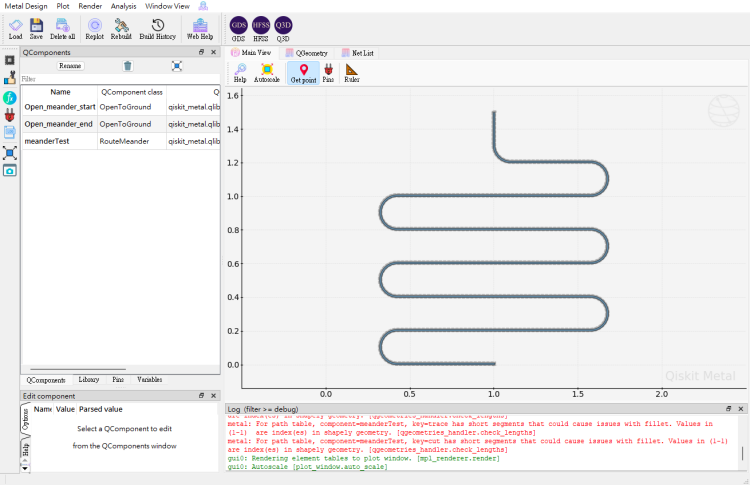

In [13]:
# Save screenshot as a .png formatted file.
gui.screenshot()

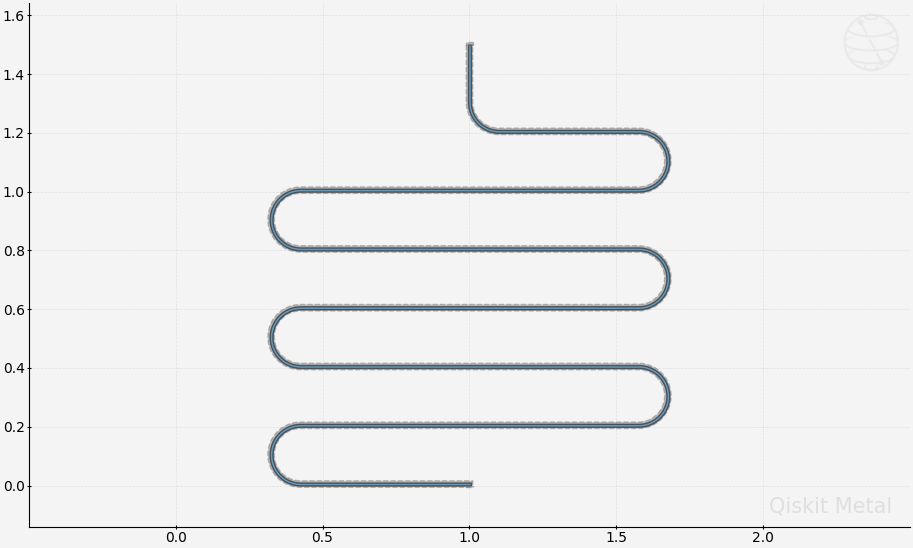

In [14]:
# Screenshot the canvas only as a .png formatted file.
gui.figure.savefig('shot.png')

from IPython.display import Image, display
_disp_ops = dict(width=500)
display(Image('shot.png', **_disp_ops))


In [15]:
# Closing the Qiskit Metal GUI
gui.main_window.close()

True